 ## Bike Sharing Assignment Using Multiple Linear Regression


## Problem Statement
A US-based bike-sharing company, Boom Bikes, has recently experienced significant declines in revenue due to the ongoing COVID-19 pandemic. The company is struggling to stay afloat in the current market environment. In response, it has decided to develop a strategic business plan aimed at boosting its revenue once the lockdown ends and the economy returns to normal.

The company seeks to determine:

Which factors are most important in predicting the demand for shared bikes.
How effectively these factors explain the fluctuations in bike demand.
Using data gathered from various meteorological surveys and insights into people's behaviors, the company has compiled a comprehensive dataset on daily bike demand across the US, taking into account several key factors.


## Business Goal:

You are tasked with creating a model to predict the demand for shared bikes using the available independent variables. This model will help management understand how demand fluctuates based on various factors, enabling them to adjust their business strategy to align with demand levels and meet customer expectations. Additionally, the model will serve as an effective tool for management to grasp the demand dynamics in new markets.

In [3]:
## Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
bike = pd.DataFrame(pd.read_csv("day.csv"))

In [6]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Check the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# Check the shape of df

print(bike.shape)

(730, 16)


Validated number or missing values

In [11]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [12]:
# row-wise null count percentage
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

 **Validated duplicate values**

In [14]:
bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [15]:
bike_dup.shape

(730, 16)

In [16]:
bike.shape

(730, 16)

**Data Cleaning**

In [18]:
#Create a copy of the  dataframe, without the 'instant' column,

#as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=bike.iloc[:,1:16]

In [19]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64 



atemp
32.7

In [20]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Removing the columns which are not required Viz Casual,registered and instant

In [22]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [23]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### Creating Dummy Variables

In [25]:
# Check the datatypes before convertion
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [26]:
# Convert to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [27]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [28]:
#This code performs the following three actions:

#1. Creates a dummy variable for a categorical feature.
#2. Drops the original variable for which the dummy variables were created.
#3. Drops the first dummy variable from each set of dummy variables created to avoid multicollinearity (as it's typically redundant when included in the model).

bike_new = pd.get_dummies(bike_new, drop_first=True)
# Convert the boolean True/False to 1/0 for all the newly created dummy columns
bike_new = bike_new.astype(int)
# Check the resulting dataframe
bike_new.head()
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   yr            730 non-null    int32
 1   holiday       730 non-null    int32
 2   workingday    730 non-null    int32
 3   temp          730 non-null    int32
 4   atemp         730 non-null    int32
 5   hum           730 non-null    int32
 6   windspeed     730 non-null    int32
 7   cnt           730 non-null    int32
 8   season_2      730 non-null    int32
 9   season_3      730 non-null    int32
 10  season_4      730 non-null    int32
 11  mnth_2        730 non-null    int32
 12  mnth_3        730 non-null    int32
 13  mnth_4        730 non-null    int32
 14  mnth_5        730 non-null    int32
 15  mnth_6        730 non-null    int32
 16  mnth_7        730 non-null    int32
 17  mnth_8        730 non-null    int32
 18  mnth_9        730 non-null    int32
 19  mnth_10       730 non-null   

In [29]:
bike_new.shape

(730, 30)

Data Splitting

In [31]:
# Check the shape before spliting

bike_new.shape

(730, 30)

In [32]:
# Check the info before spliting

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   yr            730 non-null    int32
 1   holiday       730 non-null    int32
 2   workingday    730 non-null    int32
 3   temp          730 non-null    int32
 4   atemp         730 non-null    int32
 5   hum           730 non-null    int32
 6   windspeed     730 non-null    int32
 7   cnt           730 non-null    int32
 8   season_2      730 non-null    int32
 9   season_3      730 non-null    int32
 10  season_4      730 non-null    int32
 11  mnth_2        730 non-null    int32
 12  mnth_3        730 non-null    int32
 13  mnth_4        730 non-null    int32
 14  mnth_5        730 non-null    int32
 15  mnth_6        730 non-null    int32
 16  mnth_7        730 non-null    int32
 17  mnth_8        730 non-null    int32
 18  mnth_9        730 non-null    int32
 19  mnth_10       730 non-null   

In [33]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   yr            510 non-null    int32
 1   holiday       510 non-null    int32
 2   workingday    510 non-null    int32
 3   temp          510 non-null    int32
 4   atemp         510 non-null    int32
 5   hum           510 non-null    int32
 6   windspeed     510 non-null    int32
 7   cnt           510 non-null    int32
 8   season_2      510 non-null    int32
 9   season_3      510 non-null    int32
 10  season_4      510 non-null    int32
 11  mnth_2        510 non-null    int32
 12  mnth_3        510 non-null    int32
 13  mnth_4        510 non-null    int32
 14  mnth_5        510 non-null    int32
 15  mnth_6        510 non-null    int32
 16  mnth_7        510 non-null    int32
 17  mnth_8        510 non-null    int32
 18  mnth_9        510 non-null    int32
 19  mnth_10       510 non-null    in

In [35]:
df_train.shape

(510, 30)

In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   yr            219 non-null    int32
 1   holiday       219 non-null    int32
 2   workingday    219 non-null    int32
 3   temp          219 non-null    int32
 4   atemp         219 non-null    int32
 5   hum           219 non-null    int32
 6   windspeed     219 non-null    int32
 7   cnt           219 non-null    int32
 8   season_2      219 non-null    int32
 9   season_3      219 non-null    int32
 10  season_4      219 non-null    int32
 11  mnth_2        219 non-null    int32
 12  mnth_3        219 non-null    int32
 13  mnth_4        219 non-null    int32
 14  mnth_5        219 non-null    int32
 15  mnth_6        219 non-null    int32
 16  mnth_7        219 non-null    int32
 17  mnth_8        219 non-null    int32
 18  mnth_9        219 non-null    int32
 19  mnth_10       219 non-null    int

In [37]:
df_test.shape

(219, 30)

**EDA**

**Visualising Numeric Variables**




In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   yr            510 non-null    int32
 1   holiday       510 non-null    int32
 2   workingday    510 non-null    int32
 3   temp          510 non-null    int32
 4   atemp         510 non-null    int32
 5   hum           510 non-null    int32
 6   windspeed     510 non-null    int32
 7   cnt           510 non-null    int32
 8   season_2      510 non-null    int32
 9   season_3      510 non-null    int32
 10  season_4      510 non-null    int32
 11  mnth_2        510 non-null    int32
 12  mnth_3        510 non-null    int32
 13  mnth_4        510 non-null    int32
 14  mnth_5        510 non-null    int32
 15  mnth_6        510 non-null    int32
 16  mnth_7        510 non-null    int32
 17  mnth_8        510 non-null    int32
 18  mnth_9        510 non-null    int32
 19  mnth_10       510 non-null    in

In [41]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

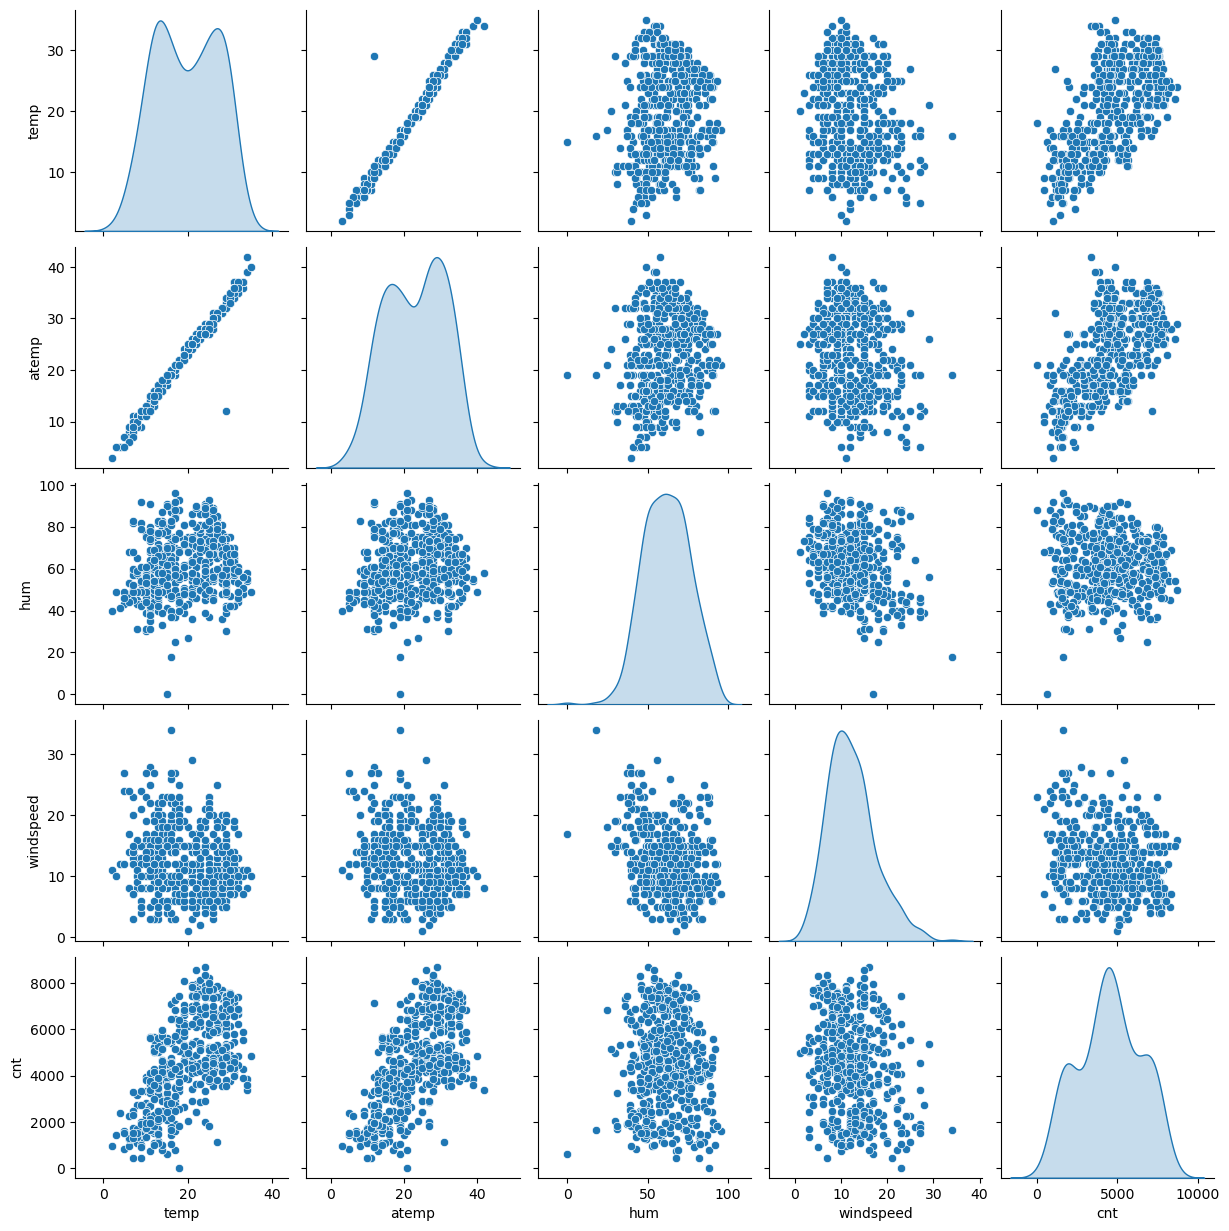

In [42]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

 #### Insights
 The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

**Visualising Categorical Variables**

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   yr            510 non-null    int32
 1   holiday       510 non-null    int32
 2   workingday    510 non-null    int32
 3   temp          510 non-null    int32
 4   atemp         510 non-null    int32
 5   hum           510 non-null    int32
 6   windspeed     510 non-null    int32
 7   cnt           510 non-null    int32
 8   season_2      510 non-null    int32
 9   season_3      510 non-null    int32
 10  season_4      510 non-null    int32
 11  mnth_2        510 non-null    int32
 12  mnth_3        510 non-null    int32
 13  mnth_4        510 non-null    int32
 14  mnth_5        510 non-null    int32
 15  mnth_6        510 non-null    int32
 16  mnth_7        510 non-null    int32
 17  mnth_8        510 non-null    int32
 18  mnth_9        510 non-null    int32
 19  mnth_10       510 non-null    in

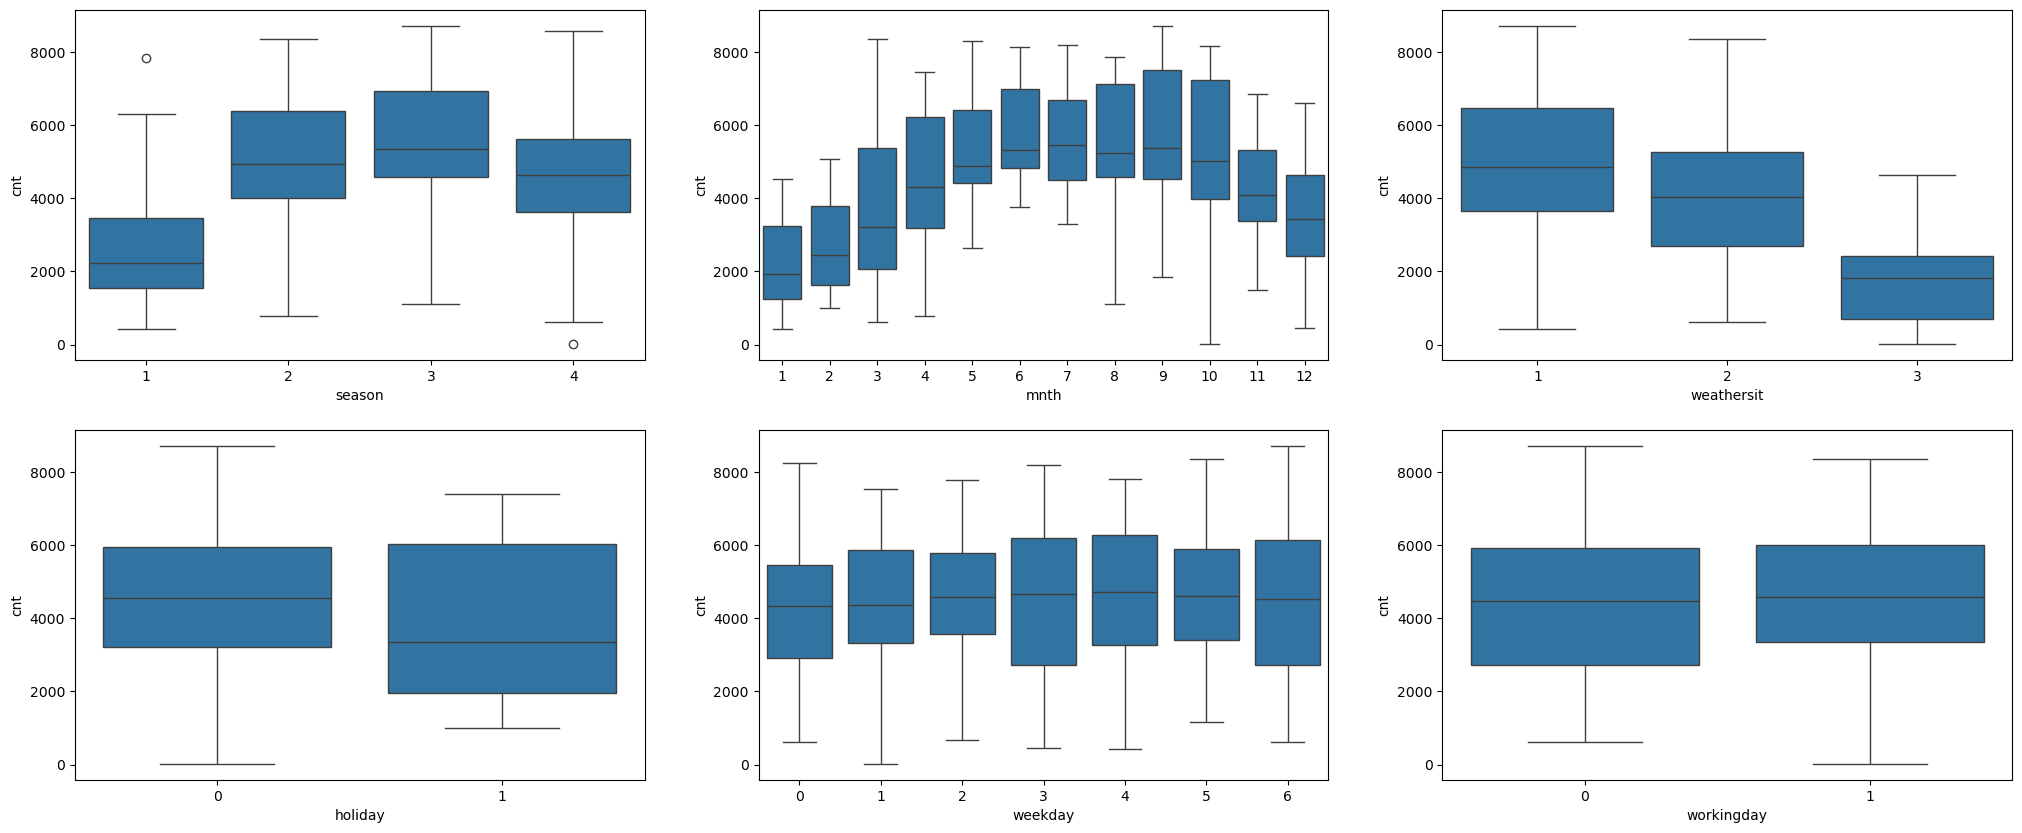

In [46]:
#Create a boxplot for all categorical variables (before dummy encoding) against the target variable 'cnt' to visualize how each predictor variable compares with the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

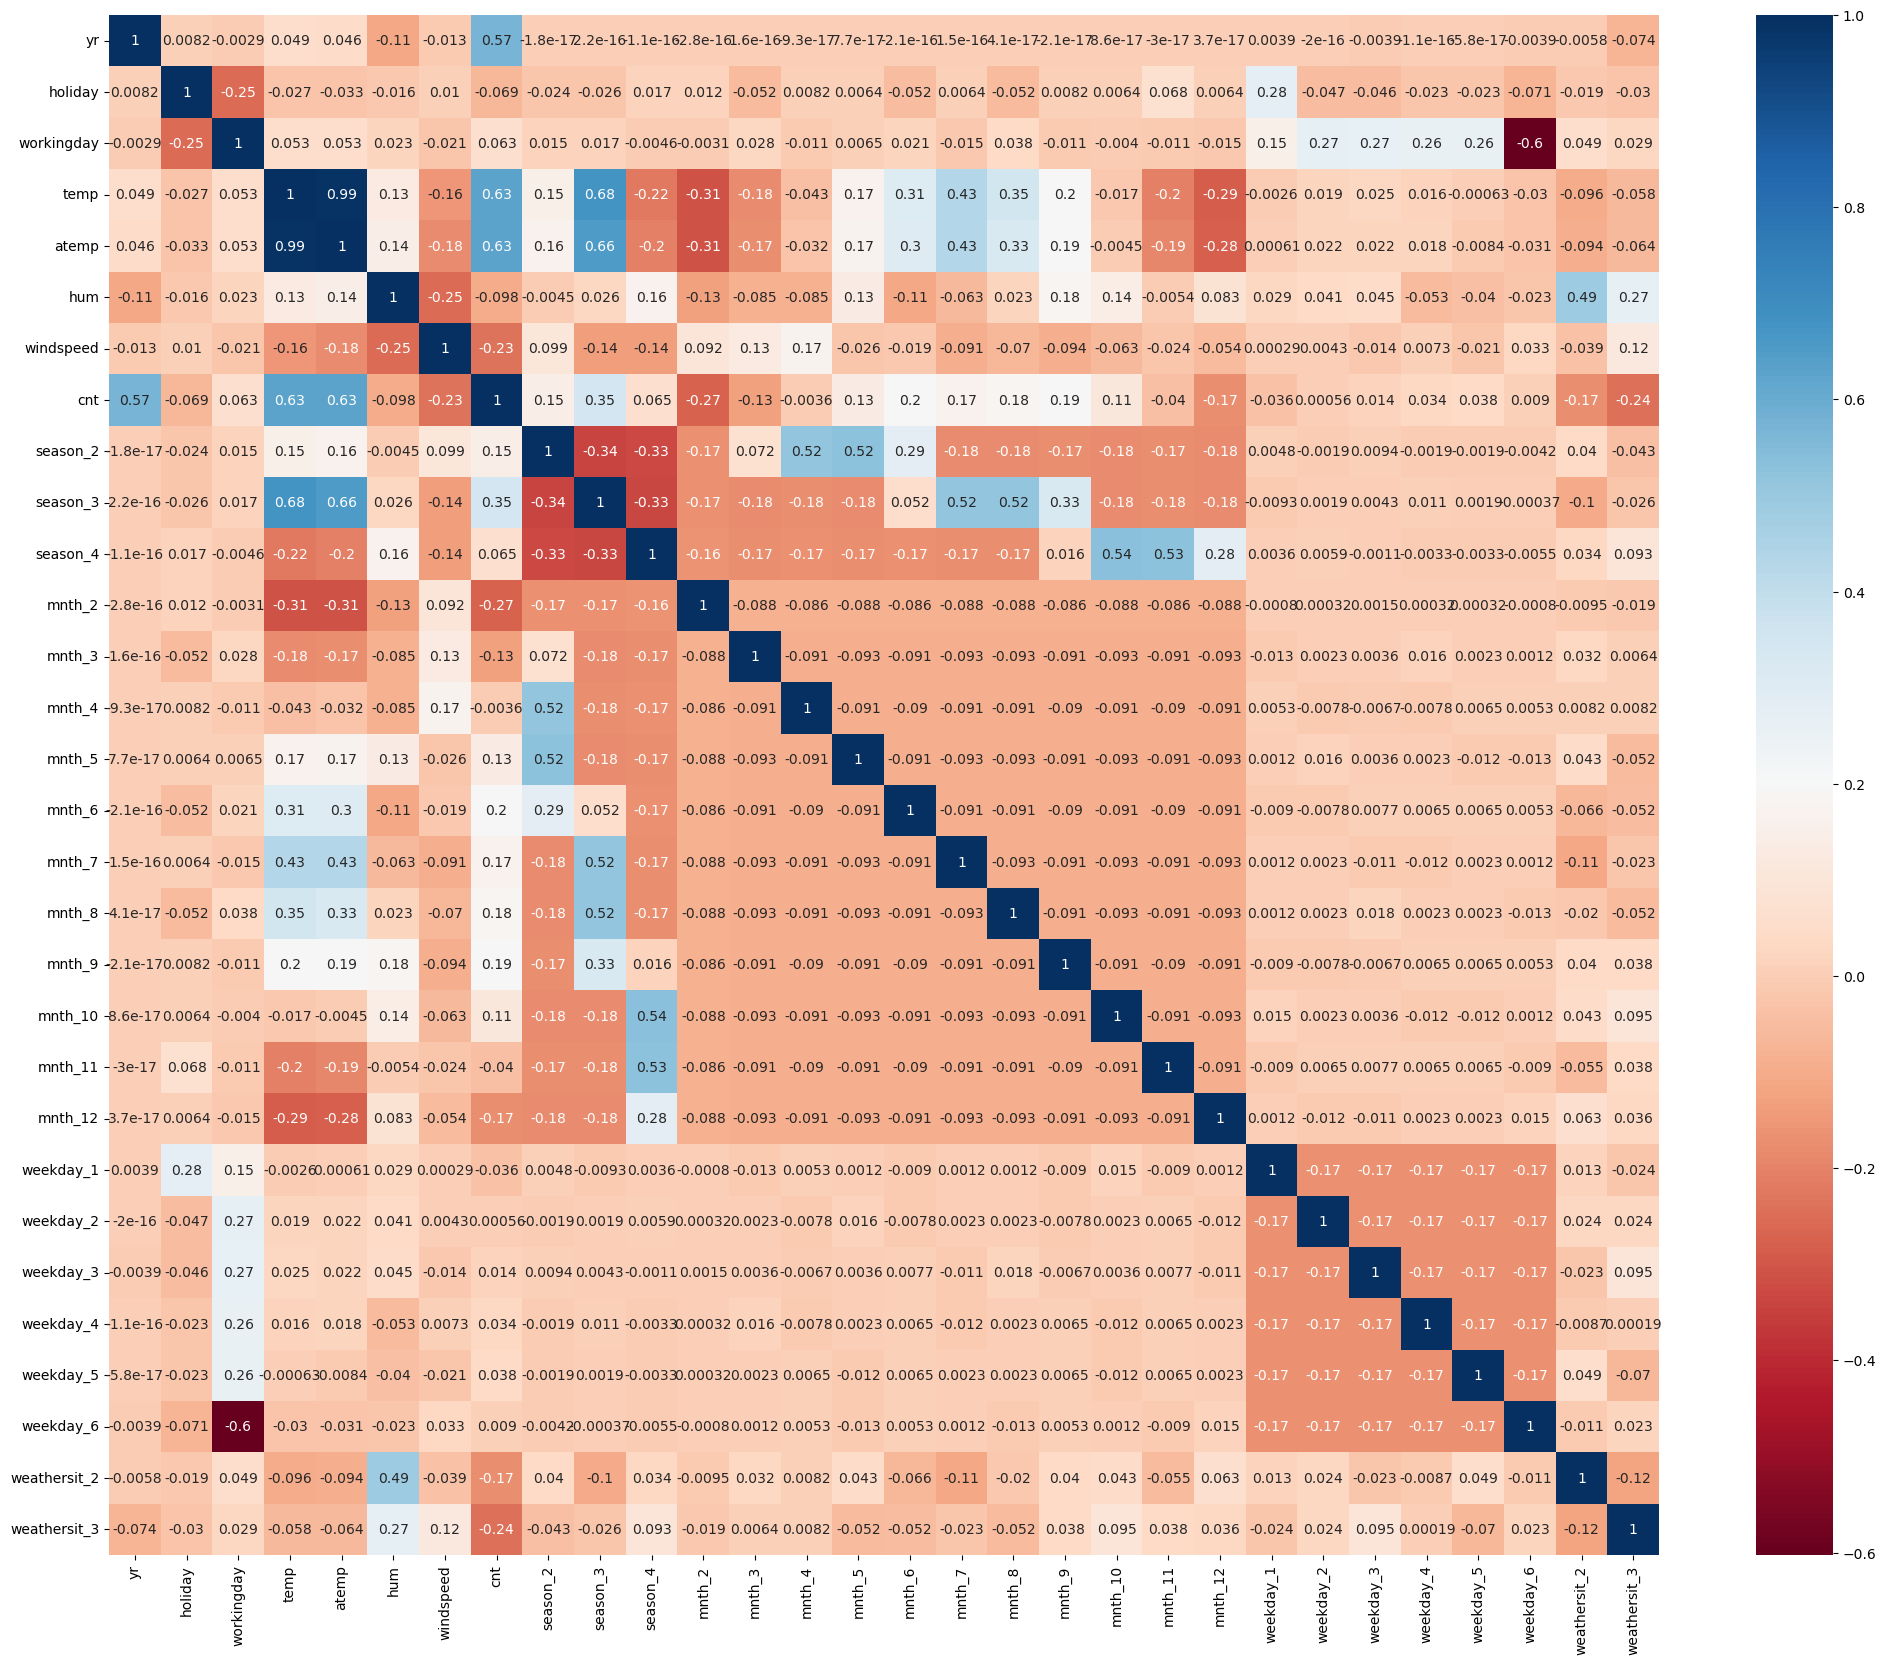

In [47]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

#### Insights:
The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.

**Rescaling**

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [52]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18,22,58,7,6304,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16,19,49,9,7109,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31,35,55,10,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14,18,83,6,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5,5,43,24,822,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [54]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [55]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.484848,0.487179,0.604167,0.181818,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.424242,0.410256,0.510417,0.242424,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.878788,0.820513,0.572917,0.272727,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.363636,0.384615,0.864583,0.151515,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.090909,0.051282,0.447917,0.696970,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.536720,0.515184,0.644036,0.341058,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227072,0.209016,0.149901,0.157847,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333333,0.333333,0.531250,0.242424,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545455,0.525641,0.645833,0.333333,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727273,0.692308,0.750000,0.424242,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Model Building(Linear)**

##### Dividing into X and Y sets for the model building

In [59]:
y_train = df_train.pop('cnt')
X_train = df_train

 **Model Building using 'Stats.**

**RFE**
 Recursive feature elimination:

 Using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [62]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [63]:
# Create the Linear Regression model
lm = LinearRegression()

# Run RFE to select 15 features
rfe = RFE(estimator=lm, n_features_to_select=15)  # Correct argument usage
rfe = rfe.fit(X_train, y_train)


In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 13),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 4),
 ('mnth_5', False, 2),
 ('mnth_6', False, 3),
 ('mnth_7', False, 14),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('weekday_1', False, 6),
 ('weekday_2', False, 15),
 ('weekday_3', False, 11),
 ('weekday_4', False, 12),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [65]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [66]:
X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [67]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

**Model 1**

**VIF Check**

In [69]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,337.86
3,atemp,331.18
4,hum,17.70
7,season_3,7.02
5,windspeed,4.63
1,workingday,4.61
6,season_2,3.52
8,season_4,3.02
13,weathersit_2,2.15
0,yr,2.02


In [70]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [71]:
# Check the parameters obtained

lr1.params

const           0.194649
yr              0.229158
workingday      0.040942
temp            0.334959
atemp           0.161194
hum            -0.180327
windspeed      -0.185351
season_2        0.132393
season_3        0.085301
season_4        0.153411
mnth_3          0.048364
mnth_9          0.099637
mnth_10         0.055748
weekday_6       0.054833
weathersit_2   -0.047276
weathersit_3   -0.271080
dtype: float64

In [72]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.1
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          4.09e-186
Time:                        17:01:50   Log-Likelihood:                 508.05
No. Observations:                 510   AIC:                            -984.1
Df Residuals:                     494   BIC:                            -916.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1946      0.030      6.506   

#### Removing the variable 'atemp' based on its High p-value & High VIF

In [74]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

**VIF Check**

In [76]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,22.87
3,hum,17.09
6,season_3,6.96
1,workingday,4.59
4,windspeed,4.53
5,season_2,3.52
7,season_4,3.01
12,weathersit_2,2.14
0,yr,2.02
11,weekday_6,1.79


In [77]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [78]:
# Check the parameters obtained

lr2.params

const           0.199599
yr              0.229092
workingday      0.041153
temp            0.483856
hum            -0.179155
windspeed      -0.192068
season_2        0.132987
season_3        0.083052
season_4        0.153893
mnth_3          0.048835
mnth_9          0.099559
mnth_10         0.056085
weekday_6       0.055204
weathersit_2   -0.047735
weathersit_3   -0.272160
dtype: float64

In [79]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.3
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          6.12e-187
Time:                        17:01:51   Log-Likelihood:                 507.29
No. Observations:                 510   AIC:                            -984.6
Df Residuals:                     495   BIC:                            -921.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1996      0.030      6.731   

### Model 3
Removing the variable 'hum' based on its Very High 'VIF' value.
Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [81]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

**VIF Check**

In [83]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,16.61
5,season_3,6.71
3,windspeed,4.27
1,workingday,4.09
4,season_2,3.50
6,season_4,2.90
0,yr,2.02
9,mnth_10,1.66
10,weekday_6,1.66
11,weathersit_2,1.54


In [84]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [85]:
lr3.params

const           0.094482
yr              0.233463
workingday      0.042859
temp            0.451195
windspeed      -0.152105
season_2        0.134464
season_3        0.092054
season_4        0.150262
mnth_3          0.056696
mnth_9          0.091037
mnth_10         0.054955
weekday_6       0.055890
weathersit_2   -0.077469
weathersit_3   -0.325346
dtype: float64

In [86]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.4
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          3.00e-183
Time:                        17:01:51   Log-Likelihood:                 495.76
No. Observations:                 510   AIC:                            -963.5
Df Residuals:                     496   BIC:                            -904.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0945      0.020      4.641   

 ### Model 4

In [88]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

**VIF Check**

In [90]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.90
3,windspeed,4.15
1,workingday,4.06
0,yr,2.01
5,season_4,1.97
9,weekday_6,1.66
8,mnth_10,1.63
4,season_2,1.56
10,weathersit_2,1.54
7,mnth_9,1.23


In [91]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [92]:
# Check the parameters obtained

lr4.params

const           0.079022
yr              0.231624
workingday      0.042784
temp            0.568270
windspeed      -0.156402
season_2        0.084025
season_4        0.118053
mnth_3          0.045207
mnth_9          0.103151
mnth_10         0.043320
weekday_6       0.057568
weathersit_2   -0.077721
weathersit_3   -0.317644
dtype: float64

In [93]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.6
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          2.30e-180
Time:                        17:01:51   Log-Likelihood:                 486.14
No. Observations:                 510   AIC:                            -946.3
Df Residuals:                     497   BIC:                            -891.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0790      0.020      3.872   

Insights
This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

Residual Analysis Of Training Data

In [96]:
y_train_pred = lr4.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

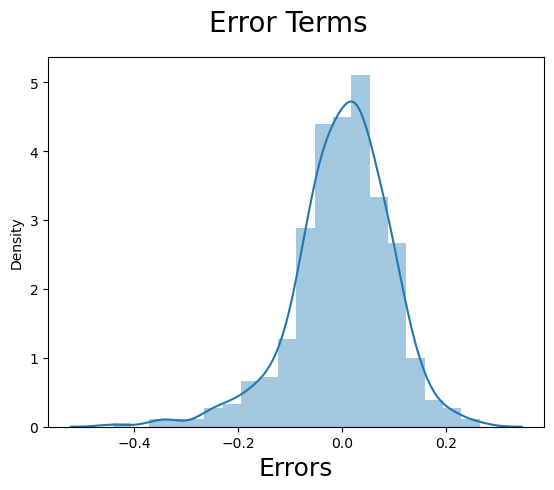

In [97]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

Insights
From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid

**MAKING MODEL PREDICTION**
Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr4)

Applying the scaling on the test sets

In [101]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform,
# as we want to use the metrics that the model learned from the training data to be applied on the test data.
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [102]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.030303,0.025641,0.447917,0.454545,0.110907,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.545455,0.538462,0.520833,0.333333,0.855729,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.939394,0.923077,0.593750,0.212121,0.534975,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.696970,0.666667,0.552083,0.484848,0.817648,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.393939,0.410256,0.614583,0.090909,0.428900,0,0,...,0,1,0,1,0,0,0,0,1,0


In [103]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.547115,0.526168,0.659532,0.341497,0.518889,0.264840,0.246575,...,0.073059,0.105023,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.324201,0.036530
std,0.501098,0.198967,0.465607,0.229218,0.210531,0.144240,0.156938,0.219953,0.442259,0.432005,...,0.260830,0.307285,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.030303,0.025641,0.302083,0.060606,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.363636,0.346154,0.552083,0.242424,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545455,0.538462,0.656250,0.333333,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757576,0.705128,0.760417,0.424242,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.969697,0.974359,1.010417,0.818182,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [105]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int32  
 1   holiday       219 non-null    int32  
 2   workingday    219 non-null    int32  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    int32  
 8   season_3      219 non-null    int32  
 9   season_4      219 non-null    int32  
 10  mnth_2        219 non-null    int32  
 11  mnth_3        219 non-null    int32  
 12  mnth_4        219 non-null    int32  
 13  mnth_5        219 non-null    int32  
 14  mnth_6        219 non-null    int32  
 15  mnth_7        219 non-null    int32  
 16  mnth_8        219 non-null    int32  
 17  mnth_9        219 non-null    int32  
 18  mnth_10       219 non-null    int3

In [106]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)
X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int32  
 2   workingday    219 non-null    int32  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    int32  
 6   season_4      219 non-null    int32  
 7   mnth_3        219 non-null    int32  
 8   mnth_9        219 non-null    int32  
 9   mnth_10       219 non-null    int32  
 10  weekday_6     219 non-null    int32  
 11  weathersit_2  219 non-null    int32  
 12  weathersit_3  219 non-null    int32  
dtypes: float64(3), int32(10)
memory usage: 15.4 KB


In [107]:
# Making predictions using the final model (lr6)

y_pred = lr4.predict(X_test_lm4)

Model Evaluation


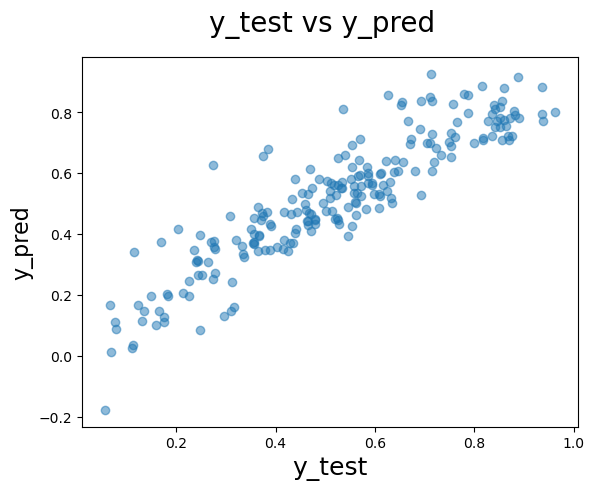

In [109]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

R² Value for TEST

In [111]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8176645515101272

** Final Result Comparison**
Train R²  :0.827
Train Adjusted R²  :0.823
Test R²  :0.8176
Test Adjusted R²  :0.812
This seems to be a really good model that can very well 'Generalize' various datasets.

**Conclusion**
According to our final model, the top three predictor variables influencing bike bookings are:

1. Temperature (temp): A coefficient value of ‘0.5683’ suggests that for each unit increase in temperature, the number of bike bookings increases by 0.5683 units.
2. Weather Situation 3 (weathersit_3): A coefficient value of ‘-0.3176’ indicates that, compared to Weathersit1, a unit increase in Weathersit3 leads to a decrease of 0.3176 units in bike bookings.
3. Year (yr): A coefficient value of ‘0.2316’ implies that for each unit increase in the year variable, the number of bike bookings rises by 0.2316 units.